# Wordcloud
kita akan membuat wordcloud dari novel Alice in Wonderland. Text novelnya ada dalam bentuk file txt.
1. instalasi package wordcloud
2. import package ke notebook
3. download data novel nya alice_novel.txt 
4. import data menggunakan open() - bukan pandas

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd

from PIL import Image

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

from wordcloud import WordCloud, STOPWORDS

In [4]:
# import file txt nya
alice_novel = open('dataset/alice_novel.txt', 'r').read()
print(len(alice_novel))
print(type(alice_novel))

145192
<class 'str'>


In [6]:
# buat wordcloud nya
alice_wc = WordCloud()
alice_wc.generate(alice_novel)

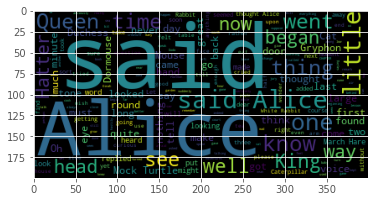

In [8]:
# pakai matplotlib untuk menunjukkan secara visual hasil wordcloud
plt.imshow(alice_wc)

(-0.5, 399.5, 199.5, -0.5)

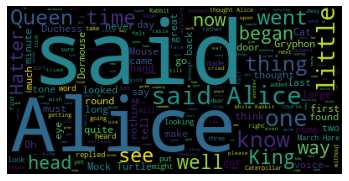

In [9]:
# opsi opsi untuk mempercantik hasil wordcloud
plt.imshow(alice_wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

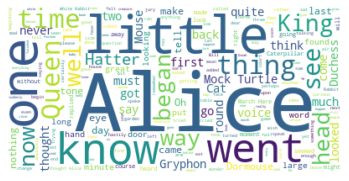

In [19]:
# membuat variable berisi stopwords, kata2 yg kita tidak mau munculkan di wordcloudnya
sw = list(STOPWORDS) # pakau stopwords bawaan package nya
sw.append('said') # nambahin kata ke stopwords

# buat wordcloud nya, kali ini dengan opsi 
alice_wc = WordCloud(
    background_color = 'white', # background wc warna apa
    max_words = 200, # jumlah maksimal kata di wc
    stopwords = sw # kata yang tidak mau di include di wc
)
alice_wc.generate(alice_novel)

# visualisasi wordcloud
plt.imshow(alice_wc, 
           interpolation='bilinear' # menghaluskan edges hasil gambar
          )
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

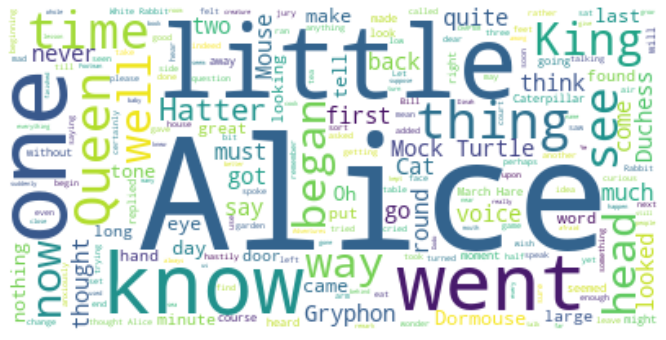

In [22]:
# visualisasi wordcloud dengan opsi figure size
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.imshow(alice_wc, 
           interpolation='bilinear' # menghaluskan edges hasil gambar
          )
plt.axis('off')

## Wordcloud dengan Custom Shape
bentuk wordcloud tidak harus kotak/ persegi panjang. bisa bentuk lain-lain dengan menggunakan mask image.

In [23]:
# import mask image alice menggunakan numpy
alice_mask = np.array(Image.open('dataset/alice_mask.png'))
print(alice_mask.shape)
print(type(alice_mask))

(900, 900)
<class 'numpy.ndarray'>


(-0.5, 899.5, 899.5, -0.5)

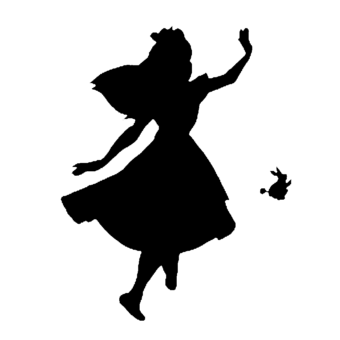

In [31]:
# lihat mask nya saja
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.imshow(alice_mask, 
           interpolation='bilinear',
           cmap=plt.cm.gray
          )
plt.axis('off')

(-0.5, 899.5, 899.5, -0.5)

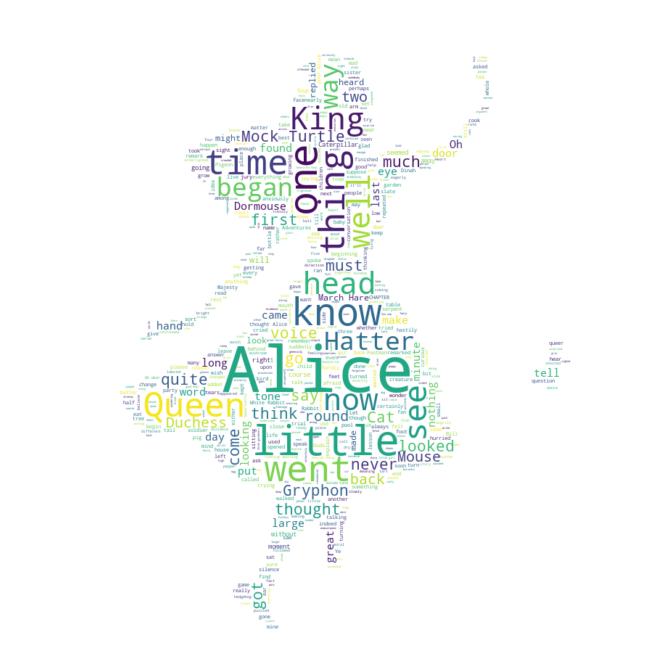

In [37]:
# wordcloud kita masih sama, yang beda hanya cara visualisasi nya
# visualisasi wordcloud dengan opsi mask
alice_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = sw,
    mask = alice_mask
)
alice_wc.generate(alice_novel)


fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(12)

plt.imshow(alice_wc, 
           interpolation='bilinear',
           cmap=plt.cm.gray
          )
plt.axis('off')

## Wordcloud dengan data Imigrasi Canada
data yang digunakan untuk wordcloud tidak harus berbentuk text novel, seminar, atau lainnya. Bisa juga data penjualan, imigrasi, dan yang bukan cerita.   

Misalkan data imigrasi Canada, kita bisa buat text dari data tersebut, untuk setiap 100 imigran -> 1 kali nama negaranya muncul. kita kumpulkan semua datanya. dari kumpulan text itu bisa dibuat wordcloud.

In [43]:
# import data imigrasi Canada
df_can = pd.read_excel("dataset/Canada.xlsx", skiprows=20, sheet_name="Canada by Citizenship", skipfooter=2)

# rapikan data

# kita ganti nama kolom biar lebih mudah dibaca
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# kita juga hapus kolom2 yang tidak kita pakai
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# kita tambahkan juga satu kolom untuk total imigrasi sebuah negara ke Canada di tahun 1980-2013
df_can['Total'] = df_can.sum(axis=1)

# untuk memudahkan ambil data kolom 1980-2013
years = range(1980, 2014)
# drop kolom tahun
df_can.drop(years, axis=1, inplace=True)

# kita gunakan Country sebagai index biar lebih berguna
df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,Total
Country,,,,
Afghanistan,Asia,Southern Asia,Developing regions,58639
Albania,Europe,Southern Europe,Developed regions,15699
Algeria,Africa,Northern Africa,Developing regions,69439
American Samoa,Oceania,Polynesia,Developing regions,6
Andorra,Europe,Southern Europe,Developed regions,15


In [45]:
df_can.shape

(195, 4)

In [56]:
total_imigrasi = df_can['Total'].sum()
print(total_imigrasi)

6409153


In [66]:
# convert per rasio imigran per negara ke total imigran

max_words = 2000
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    nama_country = ""
    panjang_nama_country = len(country.split(" "))
    if (panjang_nama_country > 1):
        nama_country = nama_country.join(country.split(" "))
    else :
        nama_country = country
        
    # nama negara sudah kita pastikan 1 kata semua
    
    # kita convert total imigran menjadi frekuensi nama negaranya muncul
    repeat_times = int(df_can.loc[country, 'Total'] / float(total_imigrasi) * max_words)
    
    # kita simpan di sebuah string
    word_string = word_string + (nama_country + " ") * repeat_times
                                     
# display the generated text
print(word_string)

Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Albania Albania Albania Albania Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Argentina Argentina Argentina Argentina Argentina Argentina Armenia Australia Australia Australia Australia Australia Australia Australia Austria Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Barbados Barbados Belarus Belarus Belgium Belgium Belgium Bhutan Bolivia(PlurinationalStateof) BosniaandHerzegovina BosniaandHerzegovina BosniaandHerzegovina BosniaandHerzegovina BosniaandHerzegovina BosniaandHerzegovi

detail penggunaan collocations bisa dilihat di dokumentasi WordCloud di https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

(-0.5, 399.5, 199.5, -0.5)

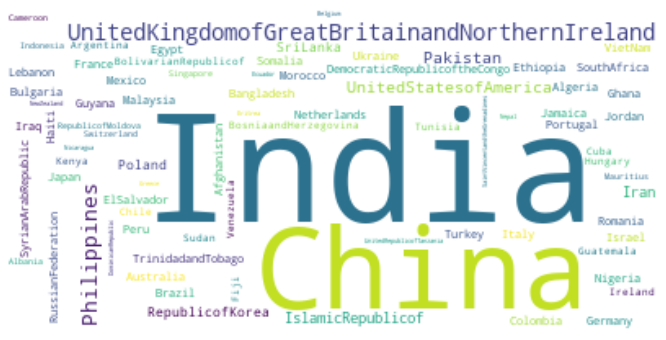

In [67]:
# buat wordcloud untuk imigrasi Canada 1980-2013
canada_wc = WordCloud(background_color="white", collocations=False).generate(word_string)

# visualisasi
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.imshow(canada_wc, interpolation='bilinear')
plt.axis('off')

## untuk latihan, boleh coba buat wordcloud sendiri
contoh dengan data https://www.gutenberg.org/cache/epub/67454/pg67454.txt   
atau buku lainnya di https://www.gutenberg.org/
